# Plant Disease Detection

## Checking the Dataset

In [5]:
# Loads an image from a specified path, retrieves its dimensions, and prints the size. 
from PIL import Image
image_path = "train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"  
image = Image.open(image_path)
width, height = image.size

print("Image Size:", (width, height))

Image Size: (256, 256)


In [2]:
# listing the class names present in the dataset
import os
dataset_dir = "train"
class_names = os.listdir(dataset_dir)
print("Total clases:", len(class_names))
for i in class_names:
  print(i)


Total clases: 38
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___healthy
Cherry_(including_sour)___Powdery_mildew
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___healthy
Corn_(maize)___Northern_Leaf_Blight
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___healthy
Strawberry___Leaf_scorch
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus

In [9]:
# This segment calculates and displays the count of images for each class in both the training and validation directories
from tabulate import tabulate

def count_images_in_directory(directory, class_name):
    class_path = os.path.join(directory, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        return num_images
    else:
        return 0

def total_images_in_directory(directory):
    total_images = 0
    class_names = os.listdir(directory)
    for class_name in class_names:
        total_images += count_images_in_directory(directory, class_name)
    return total_images

train_dir = "train"
valid_dir = "valid"

train_class_names = os.listdir(train_dir)
valid_class_names = os.listdir(valid_dir)

table_data = []

for class_name in train_class_names:
    train_images = count_images_in_directory(train_dir, class_name)
    valid_images = count_images_in_directory(valid_dir, class_name)
    table_data.append([class_name, train_images, valid_images])

train_total = total_images_in_directory(train_dir)
valid_total = total_images_in_directory(valid_dir)

table_data.append(["Total", train_total, valid_total])

print(tabulate(table_data, headers=["Class", "Train Images", "Valid Images"], tablefmt="grid"))


+----------------------------------------------------+----------------+----------------+
| Class                                              |   Train Images |   Valid Images |
+====================================================+================+================+
| Apple___Apple_scab                                 |           2017 |            504 |
+----------------------------------------------------+----------------+----------------+
| Apple___Black_rot                                  |           1987 |            497 |
+----------------------------------------------------+----------------+----------------+
| Apple___Cedar_apple_rust                           |           1760 |            440 |
+----------------------------------------------------+----------------+----------------+
| Apple___healthy                                    |           2008 |            502 |
+----------------------------------------------------+----------------+----------------+
| Blueberry___healthy

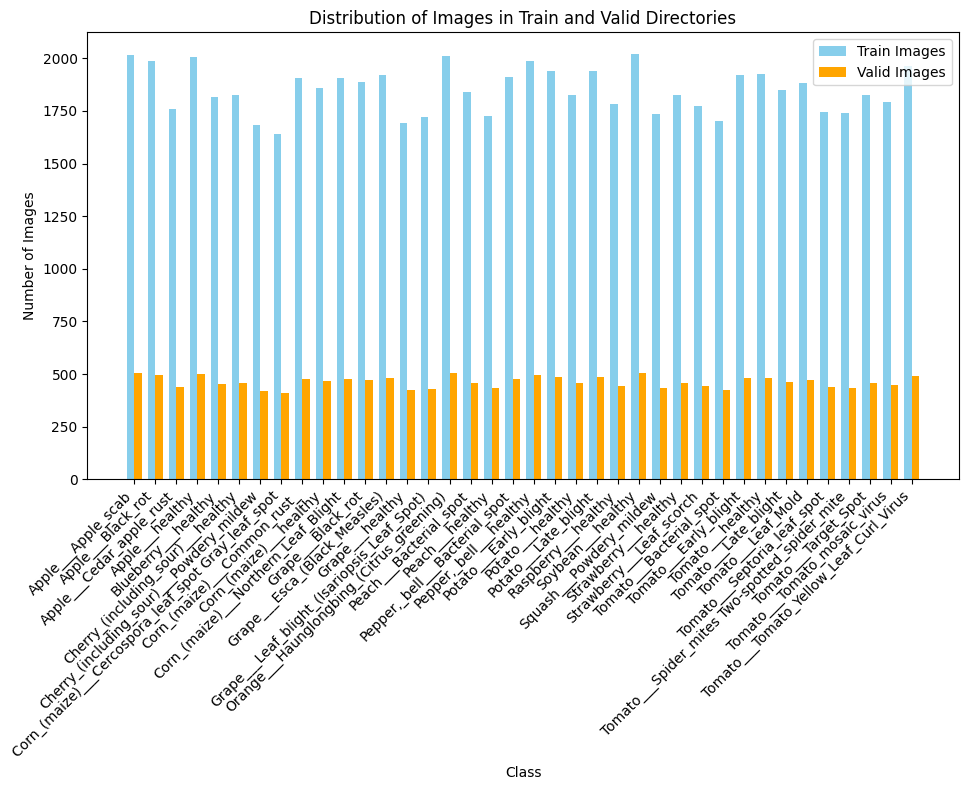

In [8]:
# This segment generates a bar plot using Matplotlib to visualize the distribution of images in the training and validation directories.
import matplotlib.pyplot as plt
import numpy as np

def count_images_in_directory(directory, class_name):
    class_path = os.path.join(directory, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        return num_images
    else:
        return 0

train_dir = "train"
valid_dir = "valid"

train_class_names = os.listdir(train_dir)
valid_class_names = os.listdir(valid_dir)

class_names = train_class_names  # Assuming both train and valid directories have the same classes

train_images = []
valid_images = []

for class_name in class_names:
    train_images.append(count_images_in_directory(train_dir, class_name))
    valid_images.append(count_images_in_directory(valid_dir, class_name))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = np.arange(len(class_names))

# Plotting the train images
train_bars = ax.bar(index, train_images, bar_width, label='Train Images', color='skyblue')

# Plotting the valid images
valid_bars = ax.bar(index + bar_width, valid_images, bar_width, label='Valid Images', color='orange')

# Adding labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Images in Train and Valid Directories')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


In [3]:
train_set = "train"  
valid_set = "valid"
def Count(dir):
  class_names = os.listdir(dir)
  total_image_count = 0
  for class_name in class_names:
      class_path = os.path.join(dir, class_name)
      class_image_count = len(os.listdir(class_path))
      total_image_count += class_image_count
  return total_image_count
train_len = Count(train_set)
valid_len = Count(valid_set)
print("Total number of Images in training set:", train_len)
print("Total number of Images in validating set:", valid_len)


Total number of Images in training set: 70296
Total number of Images in validating set: 17572


## Impoting liraries

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [5]:
train_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70296 files belonging to 38 classes.


### Validation Image Preprocessing

In [6]:
valid_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [7]:
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
valid_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

## Building Model

In [10]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layers

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [20]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling the Model

In [21]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

## Training the Model

In [23]:
training_history = cnn.fit(x=train_set,validation_data=valid_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 8303s 4s/step - loss: 1.0083 - accuracy: 0.7060 - val_loss: 0.4911 - val_accuracy: 0.8488
Epoch 2/10
2197/2197 [==============================] - 9193s 4s/step - loss: 0.2924 - accuracy: 0.9073 - val_loss: 0.1809 - val_accuracy: 0.9411
Epoch 3/10
2197/2197 [==============================] - 8529s 4s/step - loss: 0.1747 - accuracy: 0.9442 - val_loss: 0.2044 - val_accuracy: 0.9346
Epoch 4/10
2197/2197 [==============================] - 10900s 5s/step - loss: 0.1172 - accuracy: 0.9613 - val_loss: 0.1329 - val_accuracy: 0.9602
Epoch 5/10
2197/2197 [==============================] - 7498s 3s/step - loss: 0.0900 - accuracy: 0.9712 - val_loss: 0.1515 - val_accuracy: 0.9536
Epoch 6/10
2197/2197 [==============================] - 8624s 4s/step - loss: 0.0719 - accuracy: 0.9770 - val_loss: 0.1298 - val_accuracy: 0.9626
Epoch 7/10
2197/2197 [==============================] - 9113s 4s/step - loss: 0.0613 - accuracy: 0.9799 - val_loss: 0.111

## Evaluating Model

In [24]:
# Training set Accuracy
train_loss, train_acc = cnn.evaluate(train_set)
print('Training accuracy :', train_acc)

2197/2197 [==============================] - 2228s 1s/step - loss: 0.0102 - accuracy: 0.9966
Training accuracy: 0.9966000914573669


In [25]:
# Training set Loss
print('Training loss :', train_loss)

Training loss : 0.010151688940823078


In [26]:
# Validation Set Accuracy
val_loss, val_acc = cnn.evaluate(valid_set)
print('Validation accuracy :', val_acc)

550/550 [==============================] - 518s 942ms/step - loss: 0.1036 - accuracy: 0.9735
Validation accuracy : 0.9734805226325989


In [27]:
# Validation Set Loss
print('Validation loss :', val_loss)

Validation loss : 0.10360702127218246


## Saving Model

In [28]:
cnn.save('plant_disease_trained_model.h5')

C:\Users\rakesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
cnn.save('plant_disease_trained_model.keras')

In [30]:
training_history.history

{'loss': [1.0083417892456055,
  0.29238808155059814,
  0.17470519244670868,
  0.11722055077552795,
  0.09000545740127563,
  0.07191269099712372,
  0.061275728046894073,
  0.04894740879535675,
  0.04757316783070564,
  0.03793260082602501],
 'accuracy': [0.7059861421585083,
  0.9072635769844055,
  0.9441646933555603,
  0.9613491296768188,
  0.9712216854095459,
  0.9769545793533325,
  0.9798850417137146,
  0.9843234419822693,
  0.9846932888031006,
  0.9875383973121643],
 'val_loss': [0.49112045764923096,
  0.18090011179447174,
  0.20444998145103455,
  0.1328985095024109,
  0.15146830677986145,
  0.12980298697948456,
  0.11105769872665405,
  0.10754632204771042,
  0.1216583102941513,
  0.10360702127218246],
 'val_accuracy': [0.8487935066223145,
  0.9410994648933411,
  0.9346118569374084,
  0.9601638913154602,
  0.9536194205284119,
  0.9626109600067139,
  0.9663669466972351,
  0.9683587551116943,
  0.9675620198249817,
  0.9734805226325989]}

In [31]:
# Recording history in JSON
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)

In [32]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [33]:
print(training_history.history.values())

dict_values([[1.0083417892456055, 0.29238808155059814, 0.17470519244670868, 0.11722055077552795, 0.09000545740127563, 0.07191269099712372, 0.061275728046894073, 0.04894740879535675, 0.04757316783070564, 0.03793260082602501], [0.7059861421585083, 0.9072635769844055, 0.9441646933555603, 0.9613491296768188, 0.9712216854095459, 0.9769545793533325, 0.9798850417137146, 0.9843234419822693, 0.9846932888031006, 0.9875383973121643], [0.49112045764923096, 0.18090011179447174, 0.20444998145103455, 0.1328985095024109, 0.15146830677986145, 0.12980298697948456, 0.11105769872665405, 0.10754632204771042, 0.1216583102941513, 0.10360702127218246], [0.8487935066223145, 0.9410994648933411, 0.9346118569374084, 0.9601638913154602, 0.9536194205284119, 0.9626109600067139, 0.9663669466972351, 0.9683587551116943, 0.9675620198249817, 0.9734805226325989]])


## Accuracy Visualization

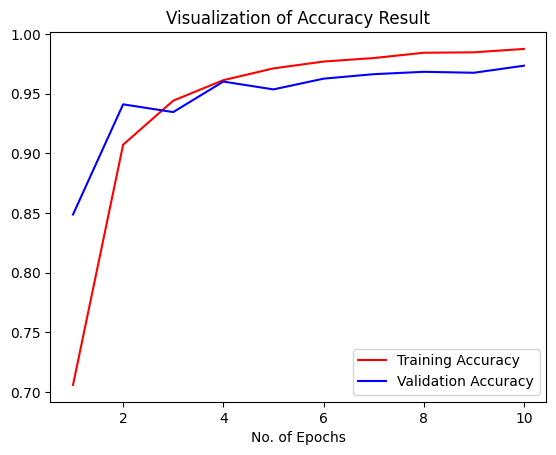

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Loss Visualization

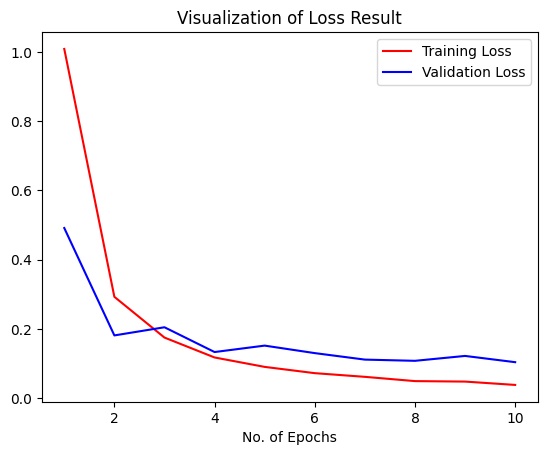

In [35]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

## Other metrics for Model Evaluation

In [36]:
class_name = valid_set.class_names

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 862s 49ms/step


In [39]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [40]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[489,   6,   0, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  0,   0, 438, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   0, 480]], dtype=int64)

In [44]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.97      0.98       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      1.00      0.99       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.85      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.87      0.97      0.

## Confusion Matrix Visualization

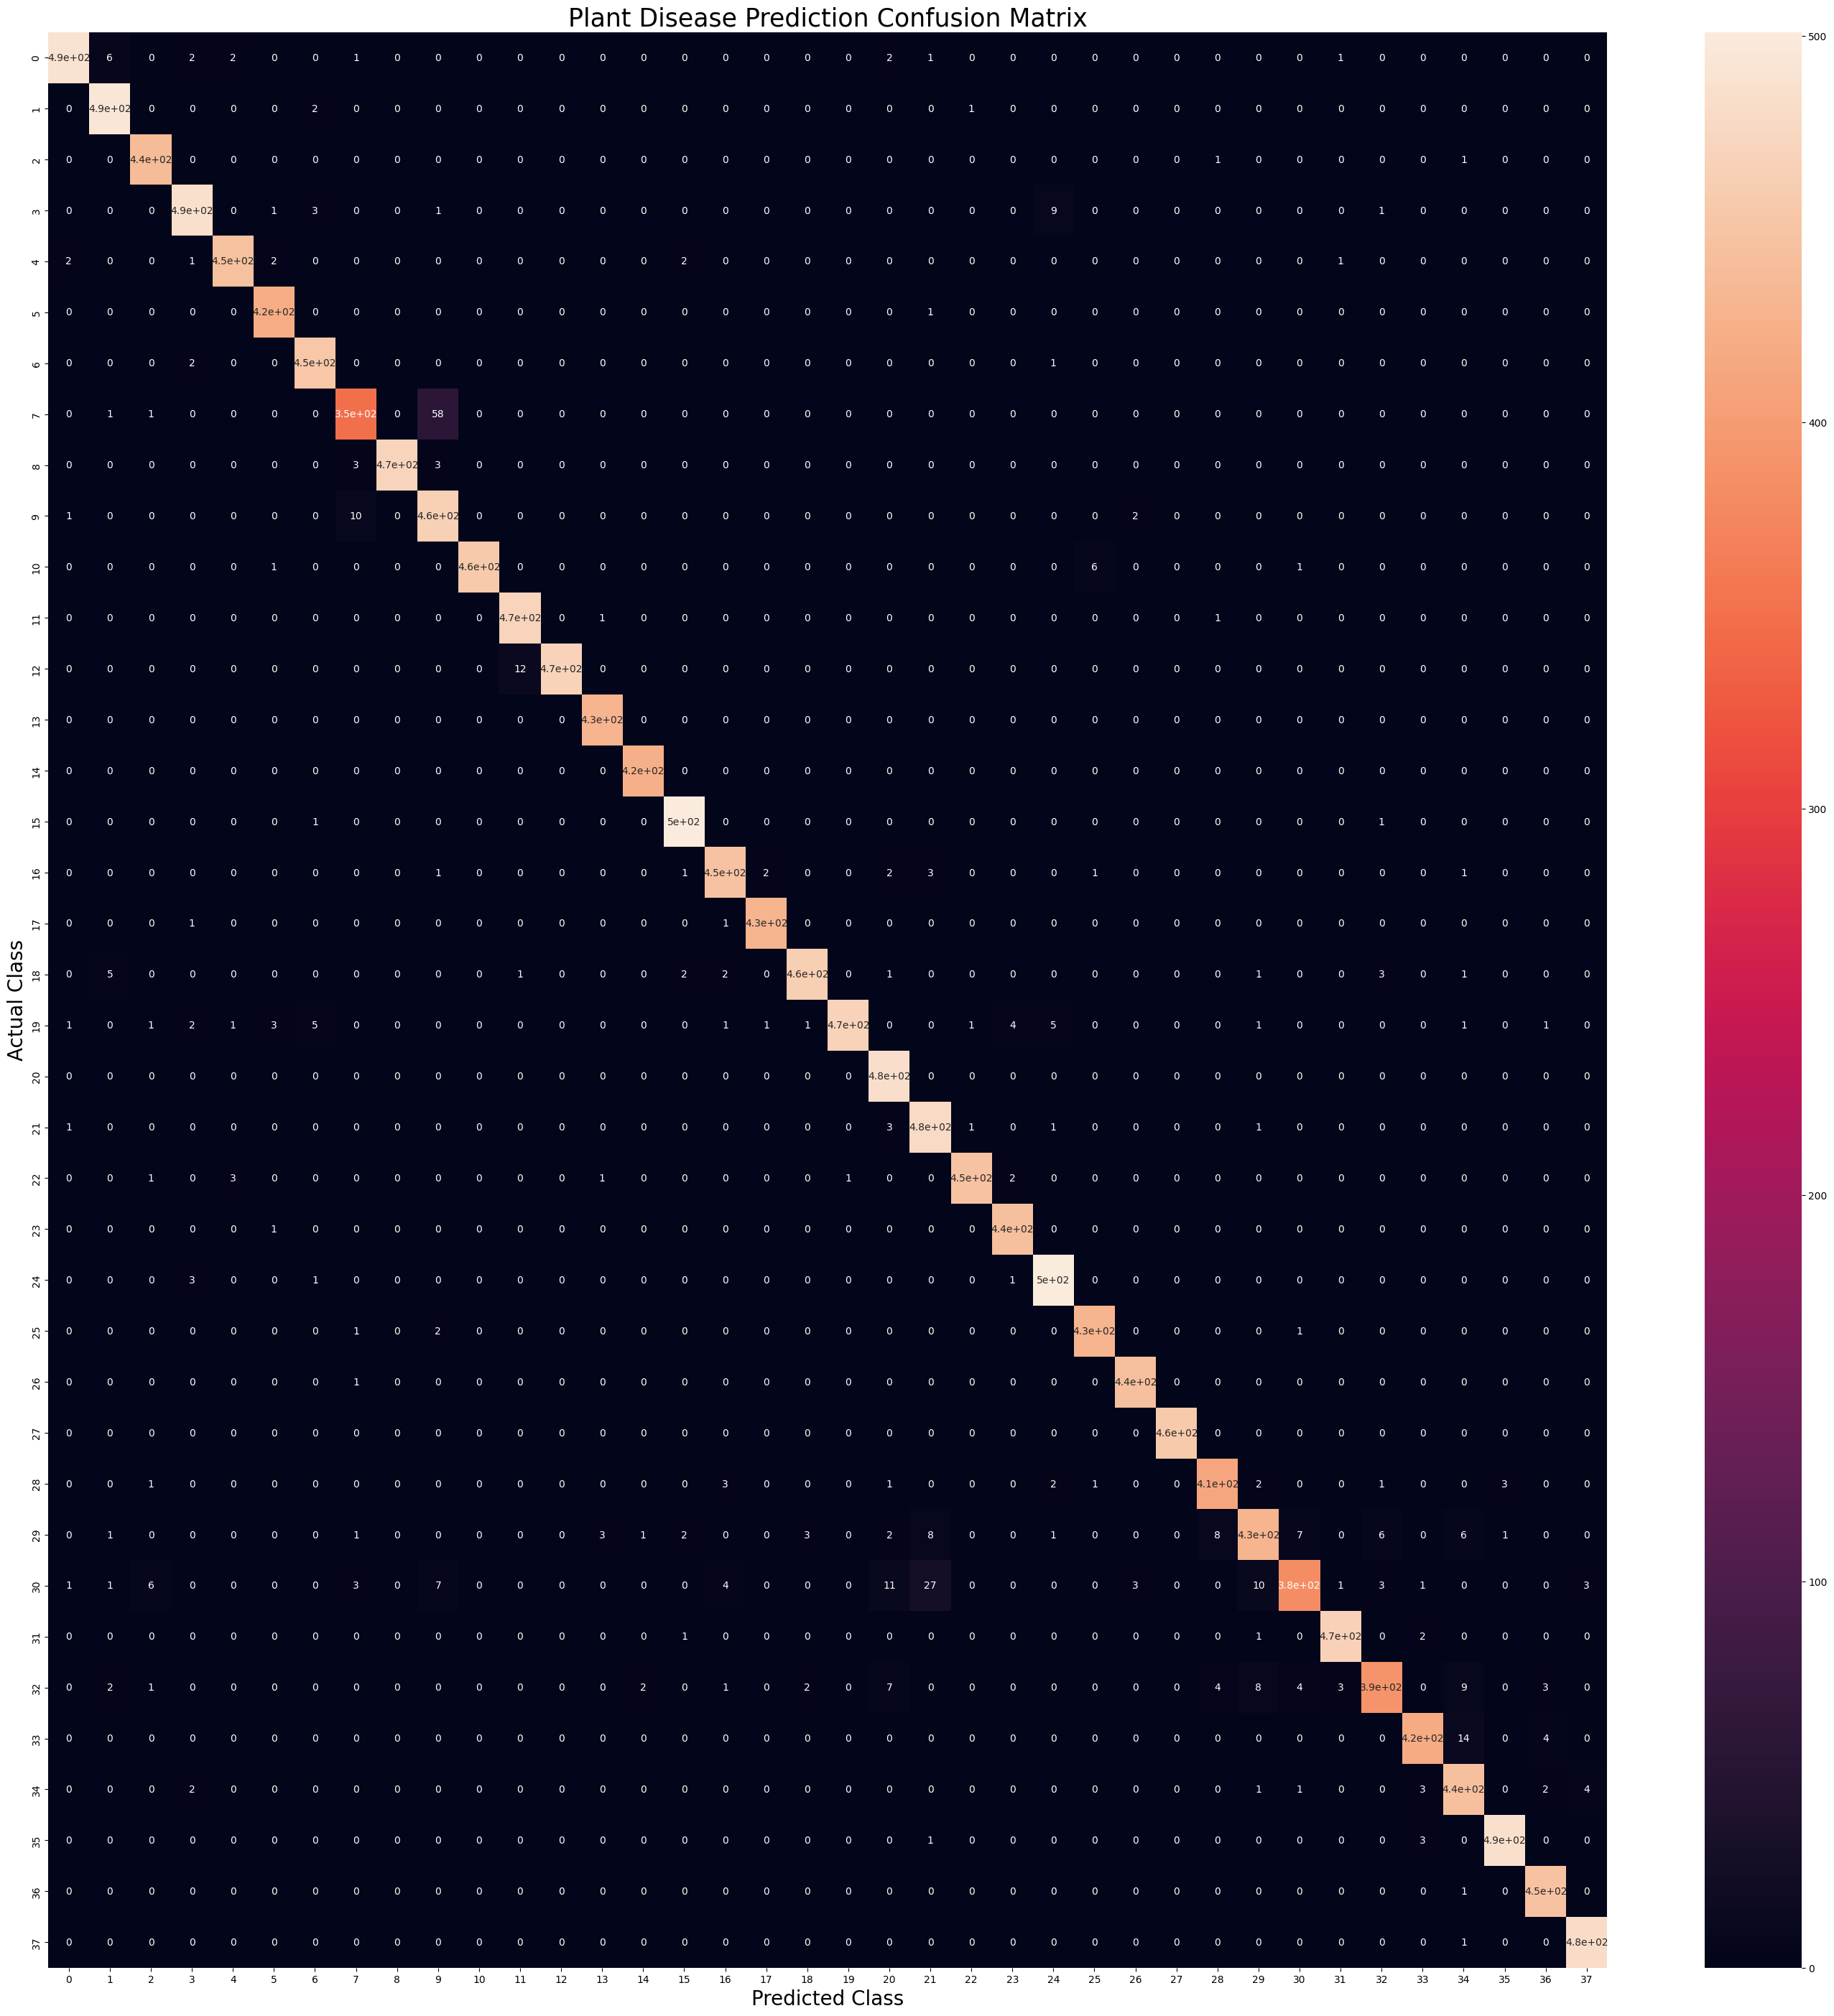

In [53]:
plt.figure(figsize=(35, 35))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()